# ANN1


- **Phần 1**: Code và câu trả lời cho "Thay đổi cấu trúc ANN".  

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
class ANN_2_4_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [4]:
class ANN_2_8_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [5]:
class ANN_2_8_6_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 6)
        self.fc3 = nn.Linear(6, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [6]:
def train_and_evaluate(model):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        preds = model(X_test)
        preds_class = (preds > 0.5).float()
        acc = accuracy_score(y_test.numpy(), preds_class.numpy())

    return loss.item(), acc


In [7]:
models = {
    "2-4-1": ANN_2_4_1(),
    "2-8-1": ANN_2_8_1(),
    "2-8-6-1": ANN_2_8_6_1()
}

for name, model in models.items():
    loss, acc = train_and_evaluate(model)
    print(f"Model {name} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")


Model 2-4-1 | Loss: 0.5396 | Accuracy: 0.7650
Model 2-8-1 | Loss: 0.2251 | Accuracy: 0.9900
Model 2-8-6-1 | Loss: 0.0162 | Accuracy: 1.0000


### So sánh kết quả các mô hình ANN

- Mô hình **2–4–1** có giá trị loss cao nhất và accuracy thấp nhất
  do số nút ẩn ít, khả năng học ranh giới phi tuyến còn hạn chế.

- Khi tăng số nút lớp ẩn lên **8 nút (2–8–1)**,
  loss giảm và accuracy tăng,
  cho thấy mô hình học được nhiều đặc trưng hơn từ dữ liệu.

- Mô hình **2–8–6–1** đạt loss thấp nhất và accuracy cao nhất,
  vì việc thêm một lớp ẩn giúp mô hình biểu diễn tốt hơn
  mối quan hệ phi tuyến phức tạp của dữ liệu dạng vòng tròn.

### Kết luận
Tăng số nút và số lớp ẩn giúp cải thiện hiệu năng mô hình ANN,
tuy nhiên mô hình càng phức tạp thì càng cần chú ý nguy cơ overfitting.


- **Phần 2**: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa". 

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


In [9]:
class ANN_2_4_1_NoSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)   # KHÔNG sigmoid
        return x


In [10]:
def train_bce_logits(model):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        logits = model(X_test)
        probs = torch.sigmoid(logits)   # sigmoid CHỈ dùng khi đánh giá
        preds = (probs > 0.5).float()
        acc = accuracy_score(y_test.numpy(), preds.numpy())

    return loss.item(), acc


In [11]:
model_logits = ANN_2_4_1_NoSigmoid()
loss_logits, acc_logits = train_bce_logits(model_logits)

print(f"BCEWithLogitsLoss | Loss: {loss_logits:.4f} | Accuracy: {acc_logits:.4f}")


BCEWithLogitsLoss | Loss: 0.4171 | Accuracy: 0.8800


In [12]:
class ANN_2_4_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [13]:
def train_sgd(model):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        preds = model(X_test)
        preds_class = (preds > 0.5).float()
        acc = accuracy_score(y_test.numpy(), preds_class.numpy())

    return loss.item(), acc


In [14]:
model_sgd = ANN_2_4_1()
loss_sgd, acc_sgd = train_sgd(model_sgd)

print(f"SGD | Loss: {loss_sgd:.4f} | Accuracy: {acc_sgd:.4f}")


SGD | Loss: 0.6965 | Accuracy: 0.3850


### So sánh hàm mất mát BCEWithLogitsLoss và BCELoss

- `BCEWithLogitsLoss` thường cho giá trị loss ổn định hơn so với `BCELoss`
  vì hàm này kết hợp sigmoid và binary cross-entropy trong một bước,
  giúp cải thiện tính ổn định số học khi huấn luyện.

- Độ chính xác giữa hai cách thường không chênh lệch nhiều,
  tuy nhiên `BCEWithLogitsLoss` có xu hướng hội tụ tốt hơn
  và ít gặp vấn đề gradient nhỏ ở đầu ra.

### So sánh SGD và Adam

- Khi dùng `SGD`, quá trình giảm loss diễn ra chậm hơn so với `Adam`,
  do SGD sử dụng cùng một learning rate cho tất cả tham số
  và không có cơ chế thích nghi.

- `Adam` giảm loss nhanh hơn và đạt accuracy cao hơn trong cùng số epoch,
  nhờ cơ chế điều chỉnh learning rate cho từng tham số
  và kết hợp momentum.

### Kết luận
`BCEWithLogitsLoss` giúp mô hình học ổn định hơn,
trong khi `Adam` là optimizer hiệu quả hơn `SGD`
trong các bài toán ANN nhỏ với số epoch hạn chế.


- **Phần 3**: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".  

In [15]:
import matplotlib.pyplot as plt

In [16]:
class ANN_2_4_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [17]:
class ANN_2_8_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [18]:
def train_and_record_loss(model, optimizer, criterion):
    loss_history = []

    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

    return loss_history


In [19]:
model_241_adam = ANN_2_4_1()
optimizer_241_adam = optim.Adam(model_241_adam.parameters(), lr=0.01)
criterion = nn.BCELoss()

loss_241_adam = train_and_record_loss(
    model_241_adam, optimizer_241_adam, criterion
)


In [20]:
model_281_adam = ANN_2_8_1()
optimizer_281_adam = optim.Adam(model_281_adam.parameters(), lr=0.01)

loss_281_adam = train_and_record_loss(
    model_281_adam, optimizer_281_adam, criterion
)


In [21]:
model_241_sgd = ANN_2_4_1()
optimizer_241_sgd = optim.SGD(model_241_sgd.parameters(), lr=0.01)

loss_241_sgd = train_and_record_loss(
    model_241_sgd, optimizer_241_sgd, criterion
)


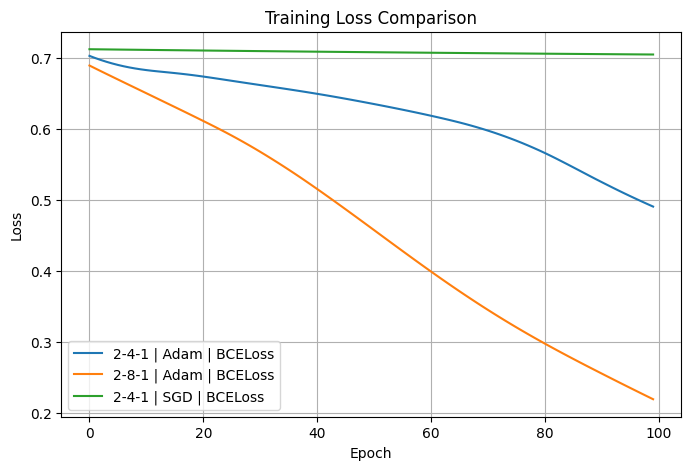

In [22]:
plt.figure(figsize=(8, 5))

plt.plot(loss_241_adam, label="2-4-1 | Adam | BCELoss")
plt.plot(loss_281_adam, label="2-8-1 | Adam | BCELoss")
plt.plot(loss_241_sgd, label="2-4-1 | SGD | BCELoss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


### Phân tích đồ thị mất mát

- Trường hợp **2–8–1 với Adam** cho thấy tốc độ giảm loss nhanh nhất.
  Điều này là do mô hình có nhiều nút ẩn hơn,
  giúp học biểu diễn dữ liệu tốt hơn,
  kết hợp với Adam có khả năng điều chỉnh learning rate thích nghi.

- Trường hợp **2–4–1 với SGD** giảm loss chậm nhất.
  SGD sử dụng learning rate cố định
  và không có cơ chế momentum thích nghi như Adam,
  nên tốc độ hội tụ thấp hơn.

- Trong quá trình huấn luyện,
  mô hình dùng **SGD** có hiện tượng loss dao động nhẹ,
  đặc biệt ở các epoch đầu.
  Nguyên nhân là do SGD nhạy cảm với learning rate
  và cập nhật tham số không ổn định khi dữ liệu phi tuyến.

### Kết luận
Adam giúp mô hình hội tụ nhanh và ổn định hơn,
trong khi SGD cần nhiều epoch hơn để đạt hiệu quả tương đương.
Việc tăng số nút ẩn cũng góp phần làm giảm loss nhanh hơn
nhờ khả năng biểu diễn mạnh hơn của mô hình.


# ANN2


- MNIST

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [48]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # giảm kích thước cho nhẹ
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(
    root="data/cat_dog",
    transform=transform
)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_data, test_data = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


In [49]:
import torch.nn as nn

class CatDogANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(64*64*3, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten
        return self.model(x)


In [50]:
import torch.optim as optim

model = CatDogANN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 42.4601
Epoch 2, Loss: 35.6003
Epoch 3, Loss: 33.9756


In [51]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        preds = (torch.sigmoid(outputs) > 0.5).int().squeeze()
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print("Accuracy:", correct / total)


Accuracy: 0.53
